<center><font size=6>Project Computer Vision: Plant Seedlings Classification </font></center>
<h3><td size=4>By: Kirti Kamerkar <br>
Date:March 11 , 2025 </td >


# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

#### **Installing Required Libraries**

In [ ]:
# Installing the libraries with the specified version.

!pip install tensorflow scikit-learn seaborn matplotlib numpy pandas opencv-python -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Restart kernel after installs so that your environment can access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### **Importing Required Libraries**

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,SpatialDropout2D # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix,accuracy_score                                                    # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [109]:
# Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/AI_LM_BusinessApplication/images.npy')      # Complete the code to read the dataset

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/AI_LM_BusinessApplication/Labels.csv')  # Complete the code to read the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Data Overview

### Understand the shape of the dataset

In [ ]:
#View the shape of image dataset
images.shape

(4750, 128, 128, 3)

In [ ]:
#View the shape of label dataset
labels.shape

(4750, 1)

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]], dtype=uint8)
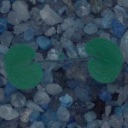

In [ ]:
#checking first value from image dataset
images[0]

In [ ]:
#Viewing first 5 label values
labels.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

In [ ]:
#Checking unique values from label dataset
labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: count, dtype: int64

In [ ]:
#labels information about its columns
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [ ]:
# unique number of labels
labels.nunique()

Label    12
dtype: int64

**Observations**
- There are total 4750 images having width 128 and height 128in pixels with 3 channels.
- This indicates that the images are in color and have 3 channels (Red, Green, Blue).
- Labels dataset represents category of each seedlings.It has only one column "Label".There are total 12 unique categories.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

### **Question1. How are these different category plant images different from each other?**

In [20]:
categories=np.unique(labels)
categories

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [ ]:
#Number of plant categories
len(categories)

12

In [ ]:
#Defining function to display images with different 12 categories
def plot_images(images, labels):
  """
  Displays a grid of images, one from each category, with their labels.

  Args:
    images: A NumPy array of images.
    labels: A Pandas DataFrame containing the labels, with a column named 'Label'.
  """

  # Get unique categories and create a dictionary mapping labels to category names
  categories = np.unique(labels['Label'])
  label_to_category = {i: category for i, category in enumerate(categories)}

  # Number of rows and columns in the grid
  rows = 5
  cols = len(categories)

  # Create the figure and axes
  fig, axes = plt.subplots(rows, cols, figsize=(15,12))  # Adjust figsize as needed

  # Iterate through categories and display a random image from each
  for i, category in enumerate(categories):
    # Filter labels for the current category
    df_label = labels[labels['Label'] == category]

    # Select a random image from this category
    random_index = np.random.choice(df_label.index)
    image = images[random_index]

    # Display the image with its label
    axes[0, i].imshow(image)  # First row for the image
    axes[0, i].set_title(category, rotation=45)
    axes[0, i].axis('off')

    # Display more images from the same category below
    for j in range(1, rows):
        random_index = np.random.choice(df_label.index)
        image = images[random_index]
        axes[j, i].imshow(image)
        axes[j, i].axis('off')

  plt.tight_layout()
  plt.show()

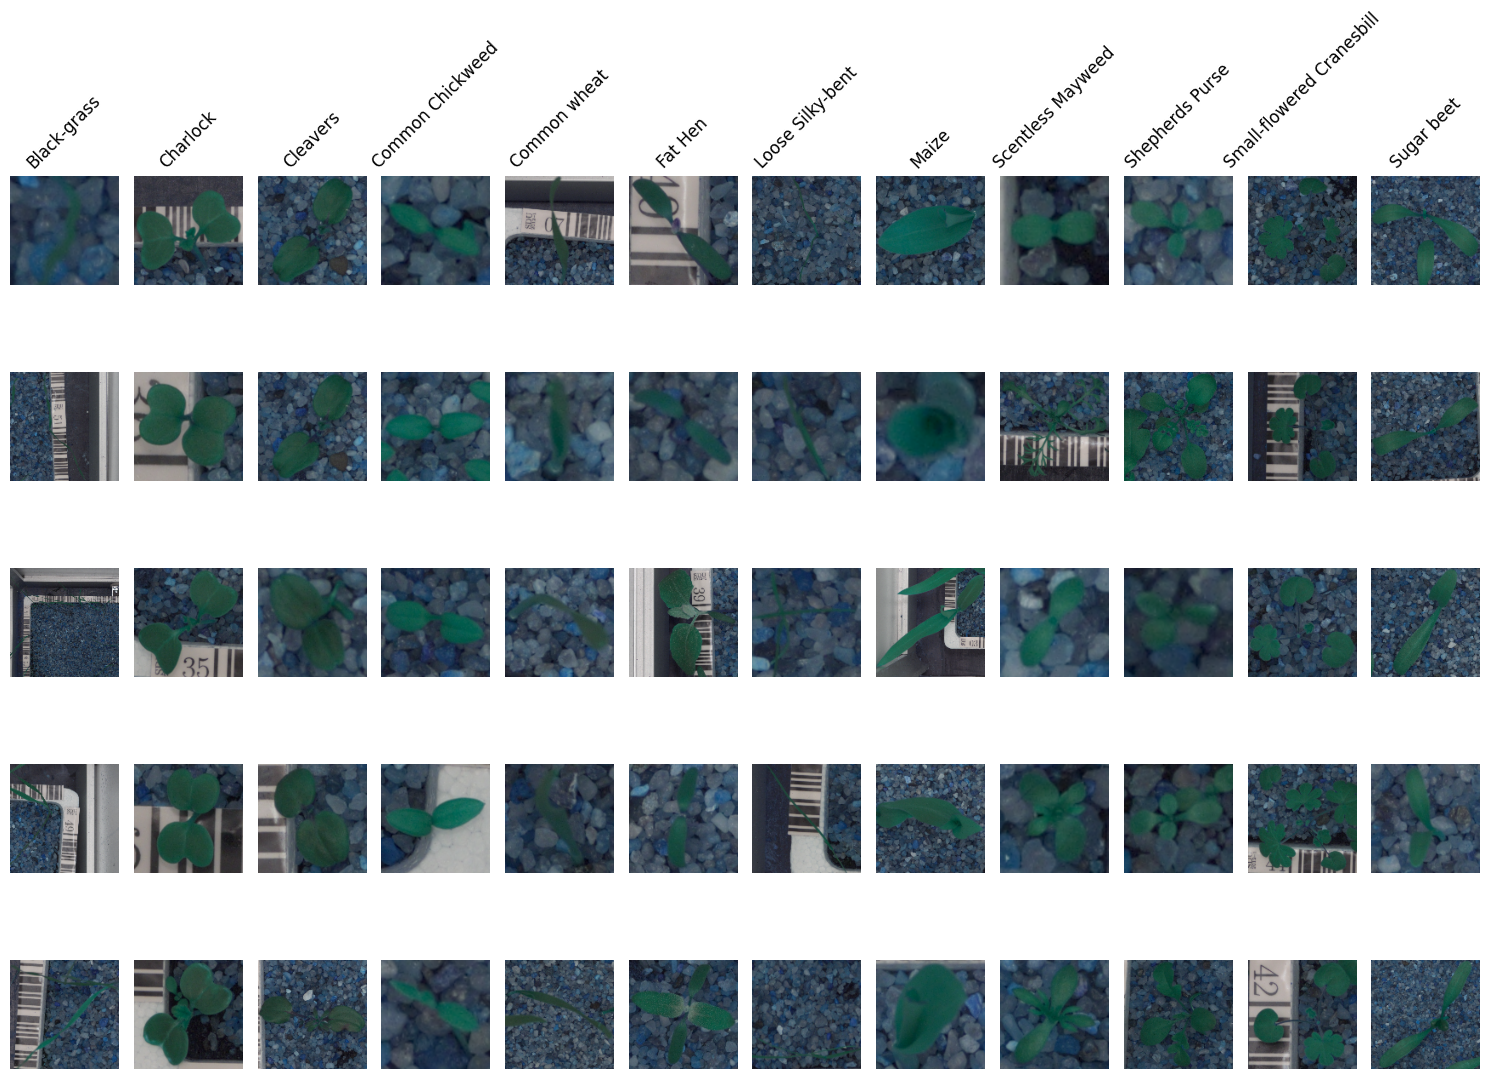

In [ ]:
#Plotting images with labels to check how different category images looks like
plot_images(images,labels)

**Observations**
- From the above plot we can see how each plant category is different from each other.
- There are 12 different kinds of plants and how images are classified.

### **Question2. Is the dataset provided an imbalance? (Check with using bar plots)**

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

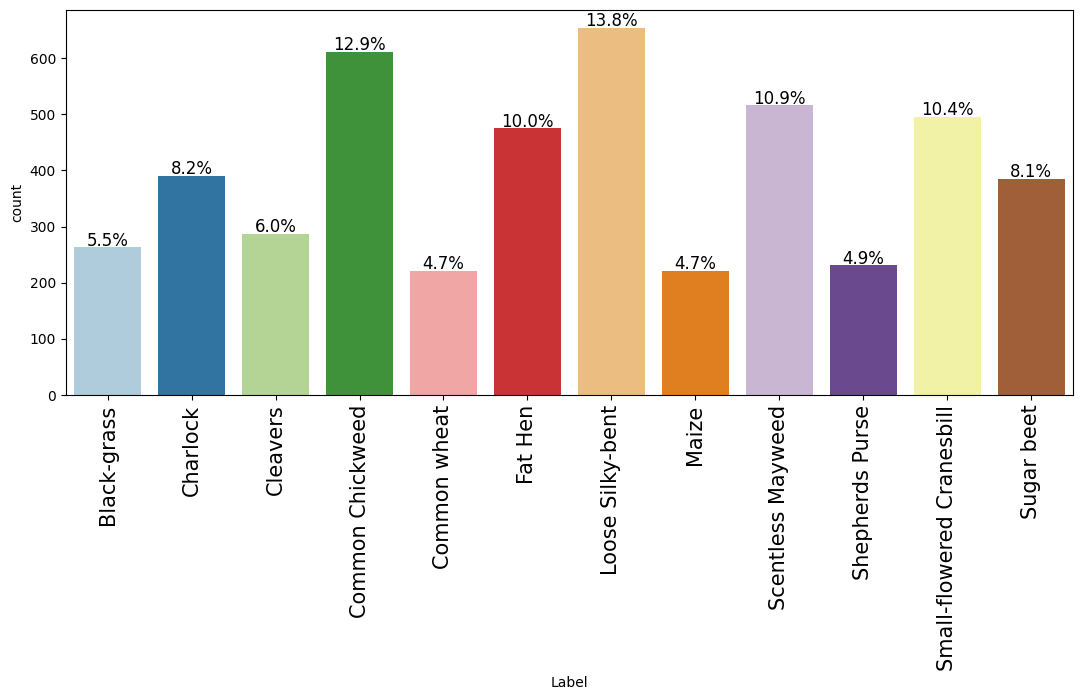

In [ ]:
# Observing distribution of each traget label.
labeled_barplot(labels,'Label',perc=True)

**Observations**
- From the above bar plot we can say that distribution of each class is imbalanced.
- Loose silky bent has more samples of images i.e.13.8% as compared to common chickweed(12.9%)
- Common wheat and maize have the least representation in the dataset, each comprising only 4.7% of the images.
- Rest of the categories lies between 5.5% to 10.9%.
- The data above demonstrates an imbalance in the distribution of target variable data.

## Data Pre-Processing

### Convert the BGR images to RGB images.

- Converting images from BGR to RGB in this case is important to ensure proper visualization and compatibility with other libraries.
- -Without the conversion, the colors would be distorted, potentially affecting the analysis and understanding of the images.


In [4]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # Complete the code to convert the images from BGR to RGB

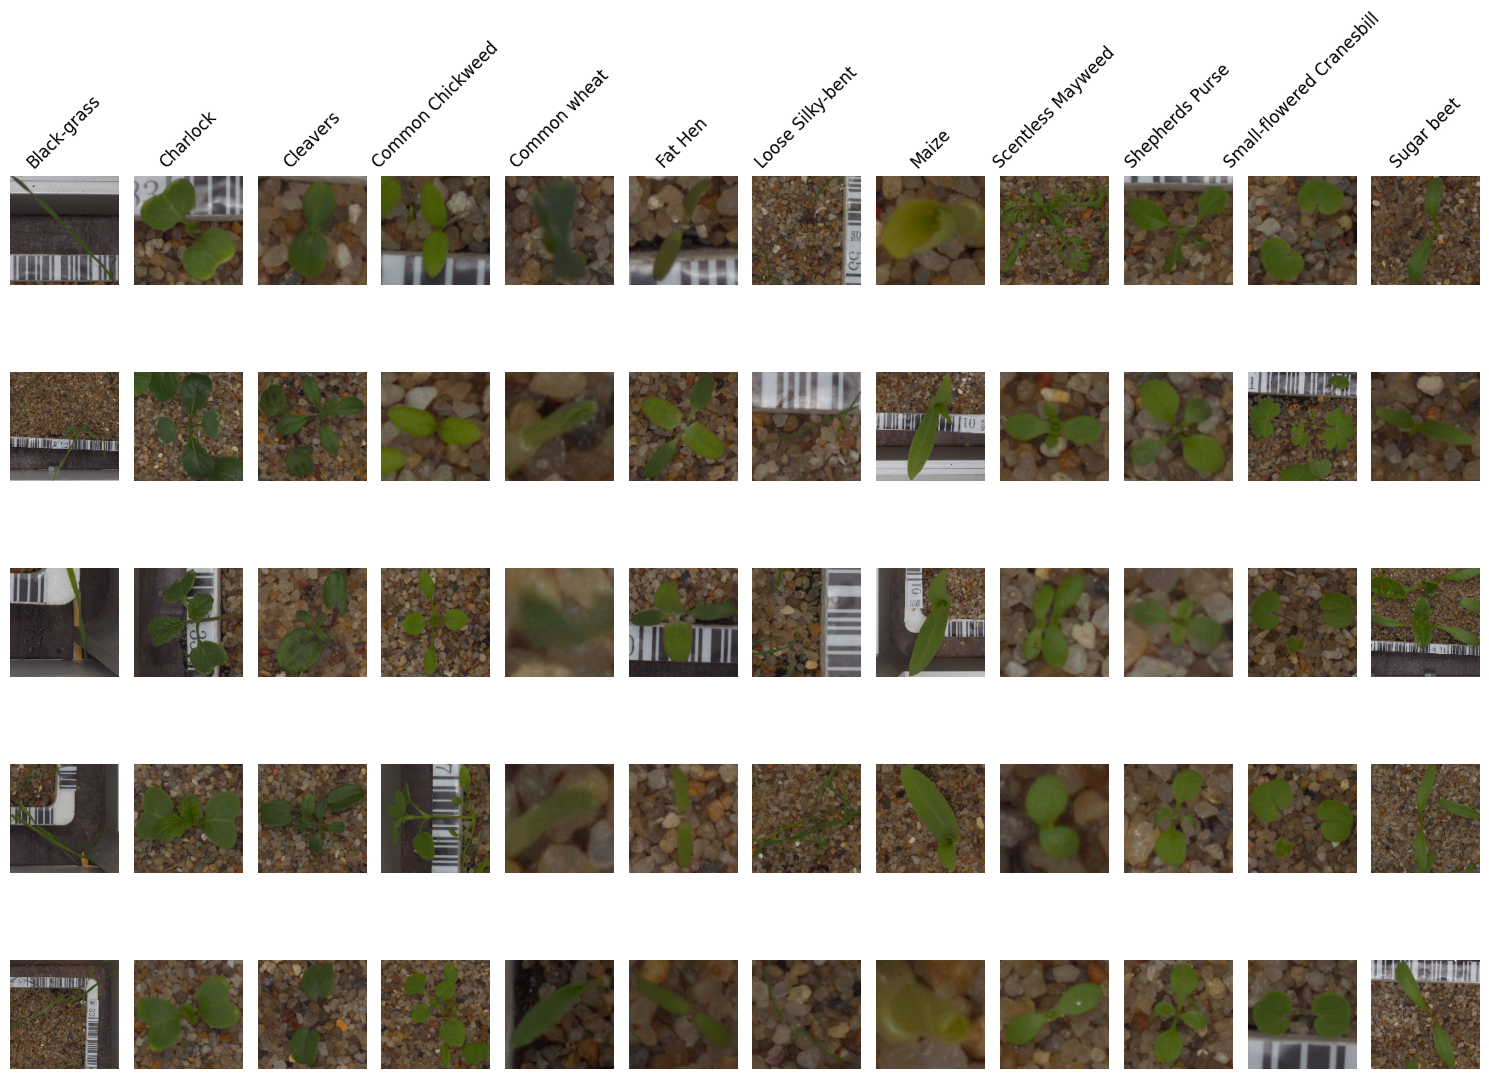

In [ ]:
#Images after converting from BGR To RGB
plot_images(images, labels)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [5]:
images_decreased=[]
height = 64                    #  defining the height as 64
width = 64                  #  defining the width as 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

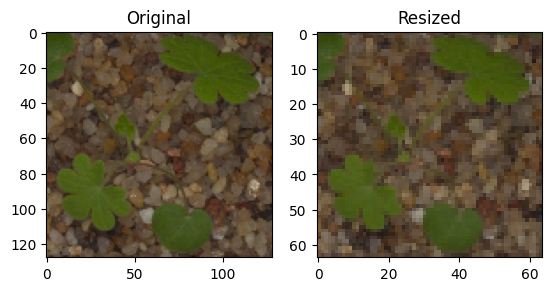

In [6]:
#Observing the difference between original resized images
count = 2
Titles = ["Original", "Resized"]
image = [images[52], images_decreased[52]]
for i in range(count):
    plt.subplot(1, count, i + 1)
    plt.title(Titles[i])
    plt.imshow(image[i])

plt.show();

**Observations**
- Here you can observe the difference between original and resized image which captures all the features as of original image.
- I've successfully decreased the size of the images while preserving their essential characteristics.
- This reduction in size can lead to faster model training and possibly improved performance by reducing the complexity of the data.

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [7]:
# split the data into train, test, and validation to be able to evaluate the model that you build on the train data
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:
X_train.shape,X_val.shape,X_test.shape

((3847, 64, 64, 3), (428, 64, 64, 3), (475, 64, 64, 3))

In [ ]:
# Complete the code to check the shape of train, validation and test data
print("The shape of Training data:",(X_train.shape,y_train.shape))
print("The shape of Validation data:", (X_val.shape,y_val.shape))
print("The shape of Testing data:", (X_test.shape,y_test.shape))

The shape of Training data: ((3847, 64, 64, 3), (3847, 1))
The shape of Validation data: ((428, 64, 64, 3), (428, 1))
The shape of Testing data: ((475, 64, 64, 3), (475, 1))


### Encode the target labels

**Here, I am using LabelBinarizer,is another technique used to encode the target variables which reduces the sparsity as compared to one hot encoder.**

In [8]:
#Using LabelBinarizer() to encode the target labels
# Storing the LabelBinarizer function in lb variable
lb = LabelBinarizer()
# Applying fit_transform on train target variable
y_train_e = lb.fit_transform(y_train)
# Applying only transform on test target variable
y_test_e = lb.transform(y_test)
y_val_e = lb.transform(y_val)

In [9]:
#checking the shape of encoded labels
y_train_e.shape,y_test_e.shape,y_val_e.shape
print("The shape of encoded Training data:",(y_train_e.shape))
print("The shape of encoded Validation data:", (y_val_e.shape))
print("The shape of encoded Testing data:", (y_test_e.shape))

The shape of encoded Training data: (3847, 12)
The shape of encoded Validation data: (428, 12)
The shape of encoded Testing data: (475, 12)


### Data Normalization

**Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [10]:
#Normalizing the data to a range of 0-1
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

## Model Building


**CNN (Convolutional Neural Network)With SGD Optimizer** 

In [11]:
#Clear the keras session
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Initialize model**

- **Filters:** 256- Number of filters in the first hidden layer.This is also called as Kernel
- **Kernel_Size:** The kernel size here refers to the widthxheight of the filter mask. The kernel_size must be an odd integer as well. Typical values for kernel_size include: (1, 1) , (3, 3) , (5, 5) , (7, 7)
- **Padding:** The padding type is called SAME because the output size is the same as the input size(when stride=1). Using 'SAME' ensures that the filter is applied to all the elements of the input. Normally, padding is set to "SAME" while training the model. Output size is mathematically convenient for further computation.
- **MaxPool2D:** Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer.
- **Flatten:** Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

In [12]:
#Intializing a sequential model with SGD optimizer 
model_1= Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension 64x64x3
model_1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64,3)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_1.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         204,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,212 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301,952 (1.15 MB)

 Trainable params: 301,952 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Complete the code to fit the model on train and also using the validation data for validation
history_1 = model_1.fit(
            X_train_normalized,
            y_train_e,
            epochs=30,
            validation_data=(X_val_normalized,y_val_e),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 10s - 83ms/step - accuracy: 0.1258 - loss: 2.4343 - val_accuracy: 0.1379 - val_loss: 2.4177
Epoch 2/30
121/121 - 2s - 20ms/step - accuracy: 0.1562 - loss: 2.3993 - val_accuracy: 0.1799 - val_loss: 2.3615
Epoch 3/30
121/121 - 1s - 10ms/step - accuracy: 0.2417 - loss: 2.2017 - val_accuracy: 0.3411 - val_loss: 1.8018
Epoch 4/30
121/121 - 1s - 10ms/step - accuracy: 0.3858 - loss: 1.7294 - val_accuracy: 0.3879 - val_loss: 1.7243
Epoch 5/30
121/121 - 1s - 10ms/step - accuracy: 0.4793 - loss: 1.5108 - val_accuracy: 0.5304 - val_loss: 1.3907
Epoch 6/30
121/121 - 1s - 11ms/step - accuracy: 0.5760 - loss: 1.2294 - val_accuracy: 0.6051 - val_loss: 1.1603
Epoch 7/30
121/121 - 2s - 20ms/step - accuracy: 0.6480 - loss: 1.0065 - val_accuracy: 0.6589 - val_loss: 1.0269
Epoch 8/30
121/121 - 1s - 10ms/step - accuracy: 0.7044 - loss: 0.8462 - val_accuracy: 0.6379 - val_loss: 1.1014
Epoch 9/30
121/121 - 1s - 10ms/step - accuracy: 0.7341 - loss: 0.7400 - val_accuracy: 0.6822 - val_loss

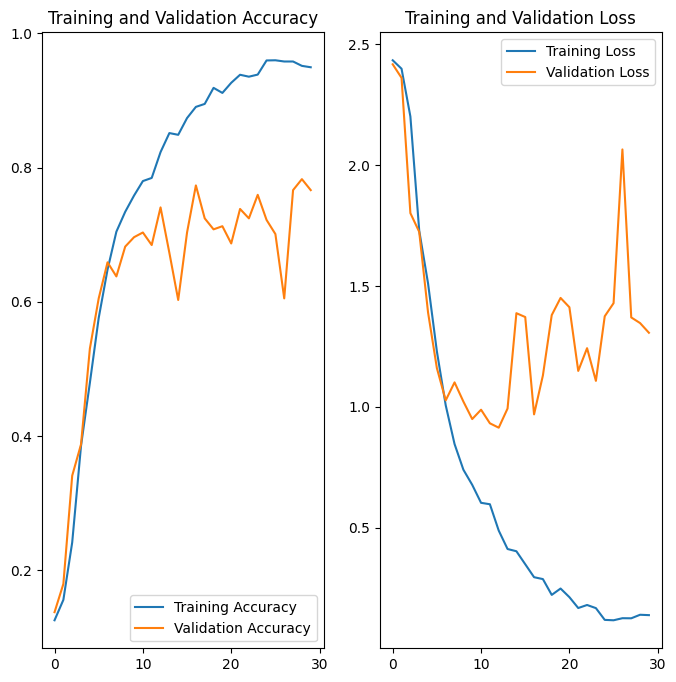

In [14]:
#Observing Accuracy and Loss response for both Training and validation data
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs=30

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations**:
- From the above responses,it shows clearly that model is overfitting.
- It's training accuracy(97%) is more more than validation accuracy which is 77%.
- There is vast difference between training loss and validation loss.

**Evaluating the model on test data**

In [15]:
accuracy = model_1.evaluate(X_test_normalized, y_test_e, verbose=2)

15/15 - 1s - 66ms/step - accuracy: 0.7579 - loss: 1.4049


**Generating the predictions using test data**

In [16]:
# Here we would get the output as probablities for each category
y_pred=model_1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [17]:
y_pred

array([[3.01892639e-14, 2.39907379e-18, 5.96572011e-12, ...,
        4.20202415e-15, 2.58122483e-14, 7.74058823e-13],
       [2.59416522e-21, 6.68598805e-05, 5.70869574e-08, ...,
        5.98243375e-08, 9.99933004e-01, 1.78954914e-16],
       [4.39574217e-23, 6.35973774e-11, 1.43191847e-10, ...,
        4.84382201e-10, 1.00000000e+00, 4.76497599e-19],
       ...,
       [9.43332240e-02, 5.49181456e-09, 3.65056714e-08, ...,
        8.84941120e-10, 1.13484075e-08, 6.75703227e-09],
       [3.22282544e-12, 3.38592116e-07, 3.89111447e-05, ...,
        2.81373356e-02, 7.50897747e-11, 1.85555916e-06],
       [1.05874837e-16, 3.66885047e-07, 1.05787969e-10, ...,
        9.96402621e-01, 6.04178922e-06, 1.31685267e-08]], dtype=float32)

In [18]:
y_test_pred_classes_ln = np.argmax(y_pred, axis=1)
normal_y_test = np.argmax(y_test_e, axis=1)
accuracy_score(normal_y_test,y_test_pred_classes_ln)

0.7578947368421053

**Plotting Confusion Matrix**

- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

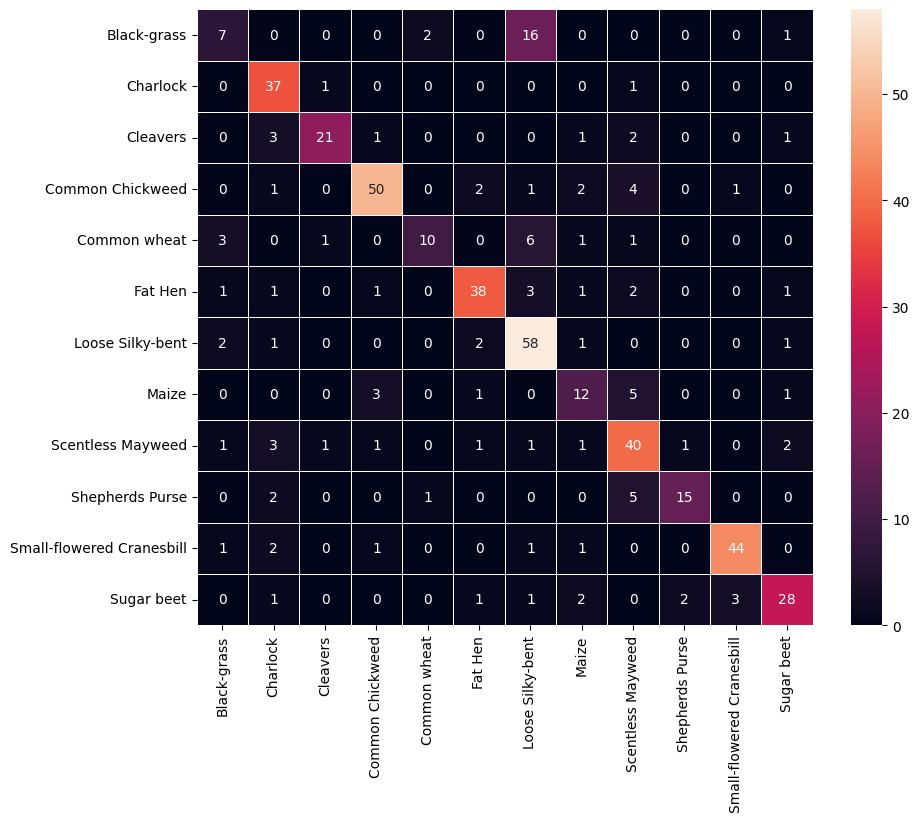

In [21]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_e,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    xticklabels=categories,
    yticklabels=categories,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [23]:
from sklearn import metrics
#Creating Classification report
cr1=metrics.classification_report(y_test_arg, y_pred_arg)
print(cr1)

              precision    recall  f1-score   support

           0       0.47      0.27      0.34        26
           1       0.73      0.95      0.82        39
           2       0.88      0.72      0.79        29
           3       0.88      0.82      0.85        61
           4       0.77      0.45      0.57        22
           5       0.84      0.79      0.82        48
           6       0.67      0.89      0.76        65
           7       0.55      0.55      0.55        22
           8       0.67      0.77      0.71        52
           9       0.83      0.65      0.73        23
          10       0.92      0.88      0.90        50
          11       0.80      0.74      0.77        38

    accuracy                           0.76       475
   macro avg       0.75      0.71      0.72       475
weighted avg       0.76      0.76      0.75       475



**Observations:**
- Here,I will get 75% accuracy score for test data.
- From the confusion matrix,we can say that common chickweek,loose silky-bent,small-flowered cranesbill predicting pretty well but still loose silk-bent gives false alarm for black-grass,common chickweed,,common wheat,fat-hen,maizeshepered purse and sugar beet.
- By examining the matrix, you can see which plant species are being confused with each other and get a sense of the overall accuracy of the model.
- You can see that the model is better at identifying some species, like Loose Silky-bent or Scentless Mayweed, and struggles with other species, like Common Chickweed, where a significant number were misclassified as Common Wheat or Small-flowered Cranesbill.

**Model 2 with Adam optimizer**

In [24]:
#Clear keras
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [25]:
#Intializing a sequential model
model_2= Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension 64x64x3
model_2.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64,3)))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_2.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(12, activation='softmax'))

# Using adam optimizer
opt = Adam()

# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         204,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,212 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301,952 (1.15 MB)

 Trainable params: 301,952 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Complete the code to fit the model on train and also using the validation data for validation
history_2 = model_2.fit(
            X_train_normalized,
            y_train_e,
            epochs=30,
            validation_data=(X_val_normalized,y_val_e),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 7s - 59ms/step - accuracy: 0.1479 - loss: 2.4168 - val_accuracy: 0.2593 - val_loss: 2.2400
Epoch 2/30
121/121 - 6s - 53ms/step - accuracy: 0.3800 - loss: 1.8161 - val_accuracy: 0.4509 - val_loss: 1.5465
Epoch 3/30
121/121 - 2s - 21ms/step - accuracy: 0.5571 - loss: 1.2864 - val_accuracy: 0.5584 - val_loss: 1.2817
Epoch 4/30
121/121 - 1s - 10ms/step - accuracy: 0.6538 - loss: 1.0048 - val_accuracy: 0.5888 - val_loss: 1.1644
Epoch 5/30
121/121 - 1s - 10ms/step - accuracy: 0.7122 - loss: 0.8326 - val_accuracy: 0.6355 - val_loss: 1.0442
Epoch 6/30
121/121 - 1s - 12ms/step - accuracy: 0.7434 - loss: 0.7404 - val_accuracy: 0.6355 - val_loss: 1.1313
Epoch 7/30
121/121 - 1s - 11ms/step - accuracy: 0.7650 - loss: 0.6663 - val_accuracy: 0.6682 - val_loss: 1.0809
Epoch 8/30
121/121 - 2s - 19ms/step - accuracy: 0.7931 - loss: 0.5782 - val_accuracy: 0.6963 - val_loss: 0.9101
Epoch 9/30
121/121 - 1s - 10ms/step - accuracy: 0.8071 - loss: 0.5525 - val_accuracy: 0.7220 - val_loss:

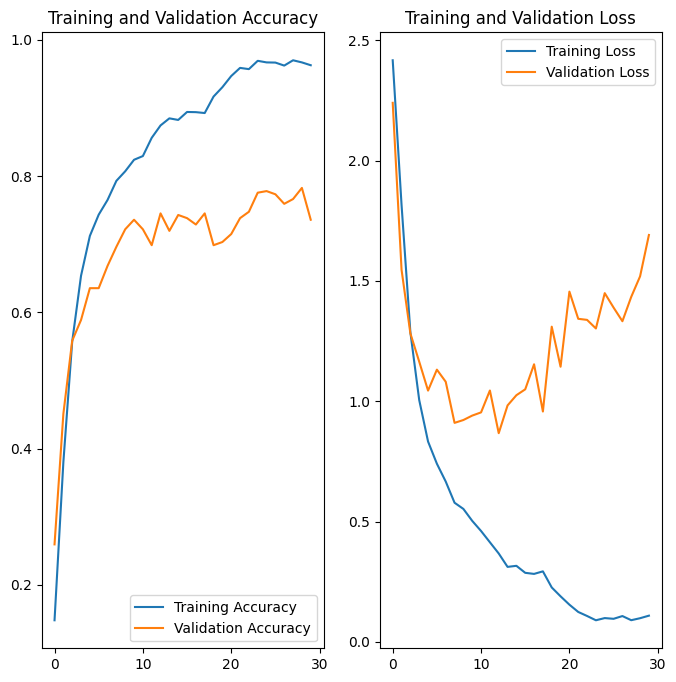

In [27]:
#Observing Accuracy and Loss response for both Training and validation data
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs=30

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations**
- This model shows overfitting,too.
- Training accuracy is littlebit improved from 97% to 98% but validation accuracy reduced from 76.6% to 73%.

**Evaluating model with Test data**

In [28]:
#Calculating accuracy for test data
accuracy = model_2.evaluate(X_test_normalized, y_test_e, verbose=2)

15/15 - 0s - 26ms/step - accuracy: 0.7179 - loss: 1.7077


In [29]:
# Here we would get the output as probablities for each category
y_pred=model_2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


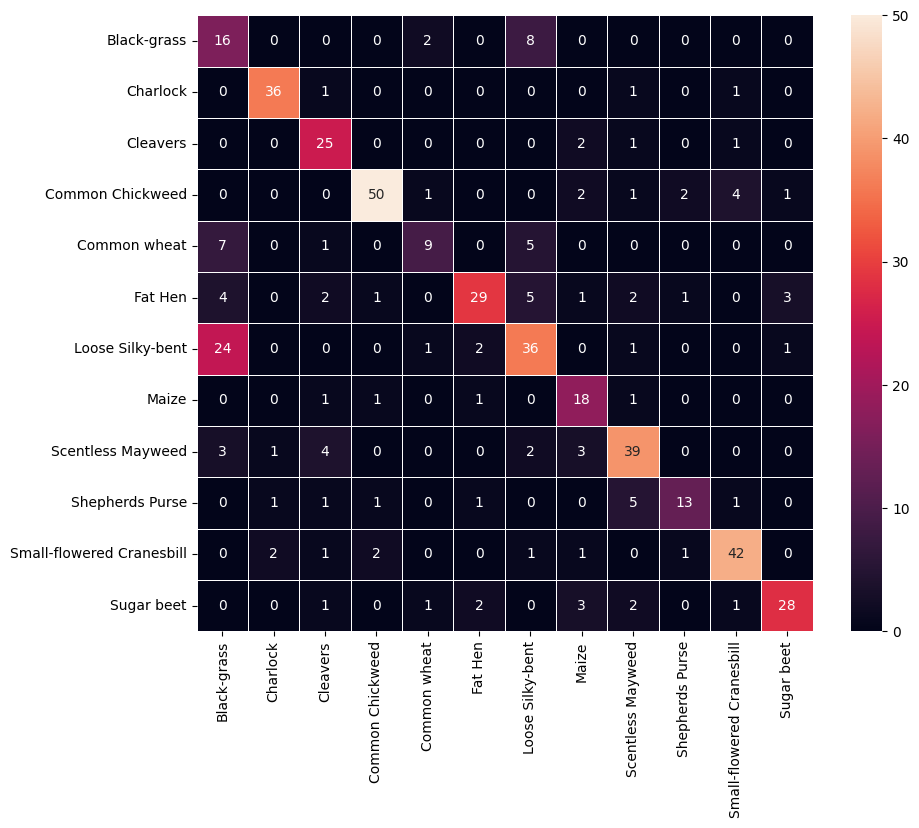

In [30]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_e,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    xticklabels=categories,
    yticklabels=categories,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [31]:
#creating classification report
cr2=metrics.classification_report(y_test_arg, y_pred_arg)
print(cr2)

              precision    recall  f1-score   support

           0       0.30      0.62      0.40        26
           1       0.90      0.92      0.91        39
           2       0.68      0.86      0.76        29
           3       0.91      0.82      0.86        61
           4       0.64      0.41      0.50        22
           5       0.83      0.60      0.70        48
           6       0.63      0.55      0.59        65
           7       0.60      0.82      0.69        22
           8       0.74      0.75      0.74        52
           9       0.76      0.57      0.65        23
          10       0.84      0.84      0.84        50
          11       0.85      0.74      0.79        38

    accuracy                           0.72       475
   macro avg       0.72      0.71      0.70       475
weighted avg       0.75      0.72      0.72       475



**Observations**
- For this model,accuracy got reduced compared to previous model (75% to 72%).
- This model shows poor predictions than first model.

**Model 3 with Batch Normalization and Dropout Layer**

In [40]:
# Clear the keras kernel
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [41]:
# Intializing a sequential model
model_3 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model_3.add(Conv2D(64, (3,3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D((2, 2), padding = 'same'))


model_3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_3.add(MaxPooling2D((2, 2), padding = 'same'))
model_3.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_3.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model_3.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model_3.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_3.add(Dense(12, activation='softmax'))

# Using adam optimizer
opt = Adam()
# Complete the code to Compile model
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,676 (592.48 KB)

 Trainable params: 151,612 (592.23 KB)

 Non-trainable params: 64 (256.00 B)

In [42]:
history_3= model_3.fit(
            X_train_normalized,
            y_train_e,
            epochs=30,
            validation_data=(X_val_normalized,y_val_e),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 8s - 70ms/step - accuracy: 0.2568 - loss: 2.2080 - val_accuracy: 0.2547 - val_loss: 2.3815
Epoch 2/30
121/121 - 1s - 7ms/step - accuracy: 0.4364 - loss: 1.7018 - val_accuracy: 0.2967 - val_loss: 2.2839
Epoch 3/30
121/121 - 1s - 7ms/step - accuracy: 0.4908 - loss: 1.5130 - val_accuracy: 0.5350 - val_loss: 1.8559
Epoch 4/30
121/121 - 1s - 10ms/step - accuracy: 0.5407 - loss: 1.3599 - val_accuracy: 0.4836 - val_loss: 1.5388
Epoch 5/30
121/121 - 1s - 6ms/step - accuracy: 0.5716 - loss: 1.2250 - val_accuracy: 0.5724 - val_loss: 1.3300
Epoch 6/30
121/121 - 1s - 10ms/step - accuracy: 0.6119 - loss: 1.1170 - val_accuracy: 0.5631 - val_loss: 1.3338
Epoch 7/30
121/121 - 1s - 7ms/step - accuracy: 0.6382 - loss: 1.0235 - val_accuracy: 0.5724 - val_loss: 1.2981
Epoch 8/30
121/121 - 1s - 10ms/step - accuracy: 0.6597 - loss: 0.9441 - val_accuracy: 0.6355 - val_loss: 1.1752
Epoch 9/30
121/121 - 1s - 7ms/step - accuracy: 0.6860 - loss: 0.8753 - val_accuracy: 0.6308 - val_loss: 1.14

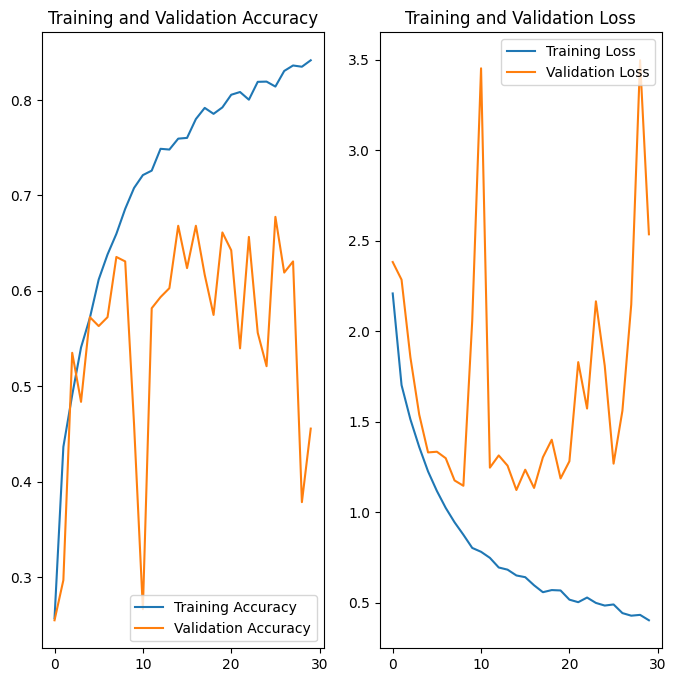

In [43]:
#Observing Accuracy and Loss response for both Training and validation data
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs=30

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations:**
- This model also shows presence of overfitting.
- Accuracy and loss response for training as well as validation data has degraded.

**Evaluating Test Data**

In [44]:
#Calculating accuracy for test data
accuracy = model_3.evaluate(X_test_normalized, y_test_e, verbose=2)

15/15 - 0s - 24ms/step - accuracy: 0.4653 - loss: 2.5514


In [56]:
# Here we would get the output as probablities for each category
y_pred=model_3.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


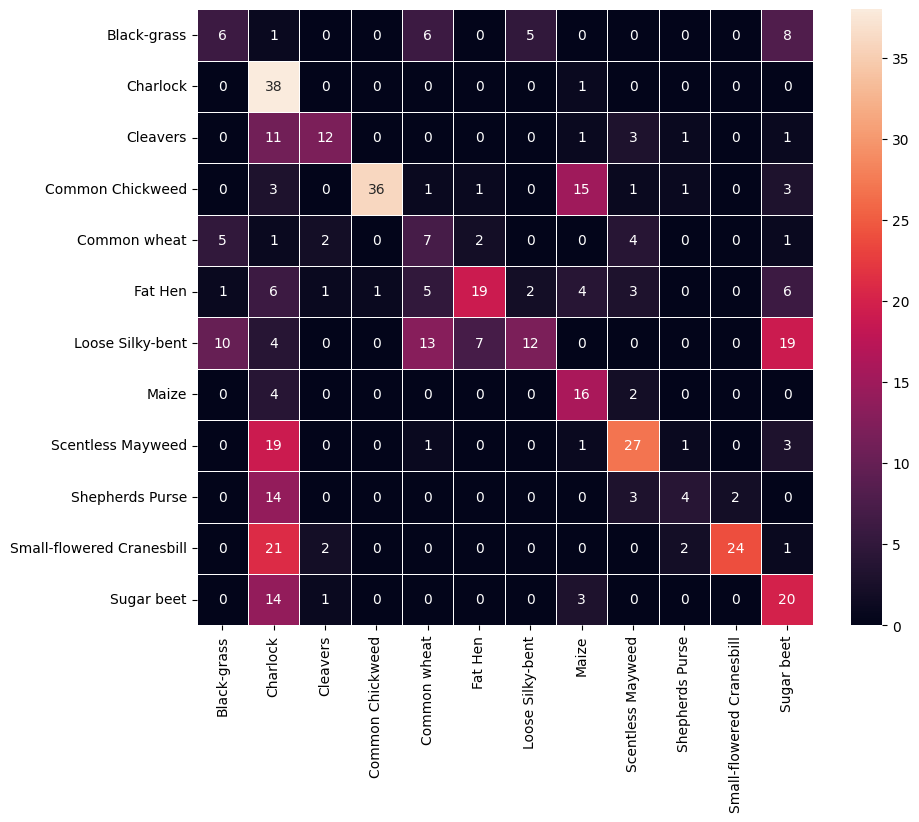

In [46]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_e,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    xticklabels=categories,
    yticklabels=categories,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [39]:
# Plotting the classification report
from sklearn import metrics
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.27      0.12      0.16        26
           1       1.00      0.31      0.47        39
           2       1.00      0.03      0.07        29
           3       0.41      0.98      0.58        61
           4       1.00      0.05      0.09        22
           5       0.78      0.29      0.42        48
           6       0.45      0.88      0.60        65
           7       0.67      0.36      0.47        22
           8       0.66      0.40      0.50        52
           9       0.19      0.17      0.18        23
          10       0.64      0.78      0.70        50
          11       0.58      0.50      0.54        38

    accuracy                           0.50       475
   macro avg       0.64      0.41      0.40       475
weighted avg       0.62      0.50      0.46       475



**Observations:**
- Accuracy and loss for test data has degraded.
- Performance is not improved.

## Model Performance Improvement


**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [47]:
# Defining learning rate reduction to  monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**
In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is Data Augmentation. CNNs have the property of translational invariance, which means they can recognise an object even if its appearance shifts translationally in some way.
Taking this attribute into account, we can augment the images using the techniques listed below -
1. Horizontal Flip (should be set to True/False)
2. Vertical Flip (should be set to True/False)
3. Height Shift (should be between 0 and 1)
4. Width Shift (should be between 0 and 1)
5. Rotation (should be between 0 and 180)
6. Shear (should be between 0 and 1)
7. Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [48]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [49]:
#Defining data generator
train_datagen = ImageDataGenerator(
    rotation_range=45,
    shear_range=0.15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [50]:
# Intializing a sequential model
model_4 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model_4.add(Conv2D(64, (3,3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of first conv layer
model_4.add(MaxPooling2D((2, 2)))


model_4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_4.add(MaxPooling2D((2, 2), padding = 'same'))
model_4.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_4.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model_4.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model_4.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_4.add(Dense(12, activation='softmax'))

# Complete the code to initialize Adam Optimimzer
opt=Adam()
# Complete the code to Compile model
model_4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,676 (592.48 KB)

 Trainable params: 151,612 (592.23 KB)

 Non-trainable params: 64 (256.00 B)

In [51]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history_4= model_4.fit(train_datagen.flow(X_train_normalized,y_train_e,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_e),
                    verbose=1)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.1490 - loss: 2.4192 - val_accuracy: 0.3201 - val_loss: 2.4179
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3594 - loss: 1.9990 - val_accuracy: 0.2196 - val_loss: 2.4226
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.3318 - loss: 2.0164 - val_accuracy: 0.3621 - val_loss: 2.3142
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3594 - loss: 2.1557 - val_accuracy: 0.3645 - val_loss: 2.3198
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.3719 - loss: 1.8596 - val_accuracy: 0.4299 - val_loss: 2.2566
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.8815 - val_accuracy: 0.4322 - val_loss: 2.2716
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.4083 - loss: 1.7504 - val_accuracy: 0.1963 - val_loss: 2.2835
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3281 - loss: 1.7983 - val_accuracy: 0.1939 - 

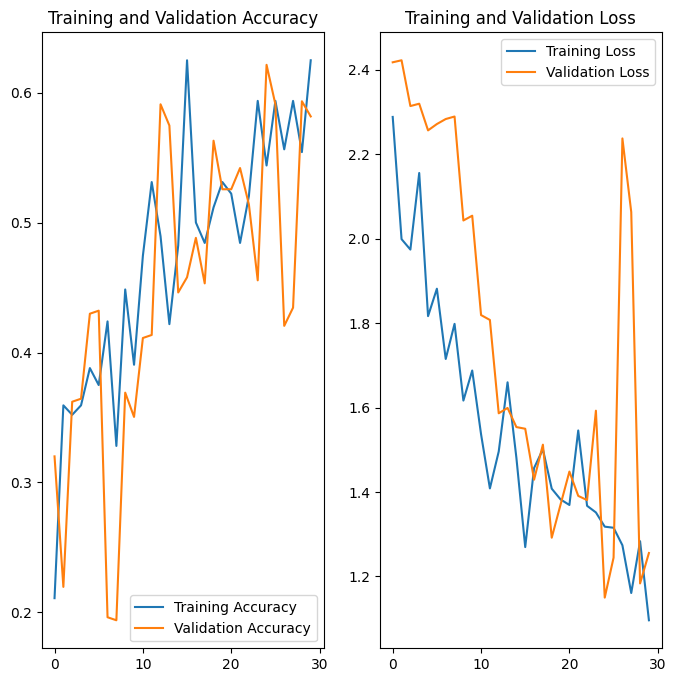

In [52]:
#Observing Accuracy and Loss response for both Training and validation data
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']
epochs=30

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations:**
- Probelm of overfitting has improved with Data augmentation.
- Validation accuracy is improved over training data.Also,validation loss is improved over training.
- But model is not performing well as we accepted.Training accuracy and validation accuracy is 54% and 59.6%.

**Evaluating Test Data**


In [53]:
#Calculating accuracy for test data
accuracy = model_4.evaluate(X_test_normalized, y_test_e, verbose=2)

15/15 - 0s - 24ms/step - accuracy: 0.5789 - loss: 1.2028


In [57]:
# Here we would get the output as probablities for each category
y_pred=model_4.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


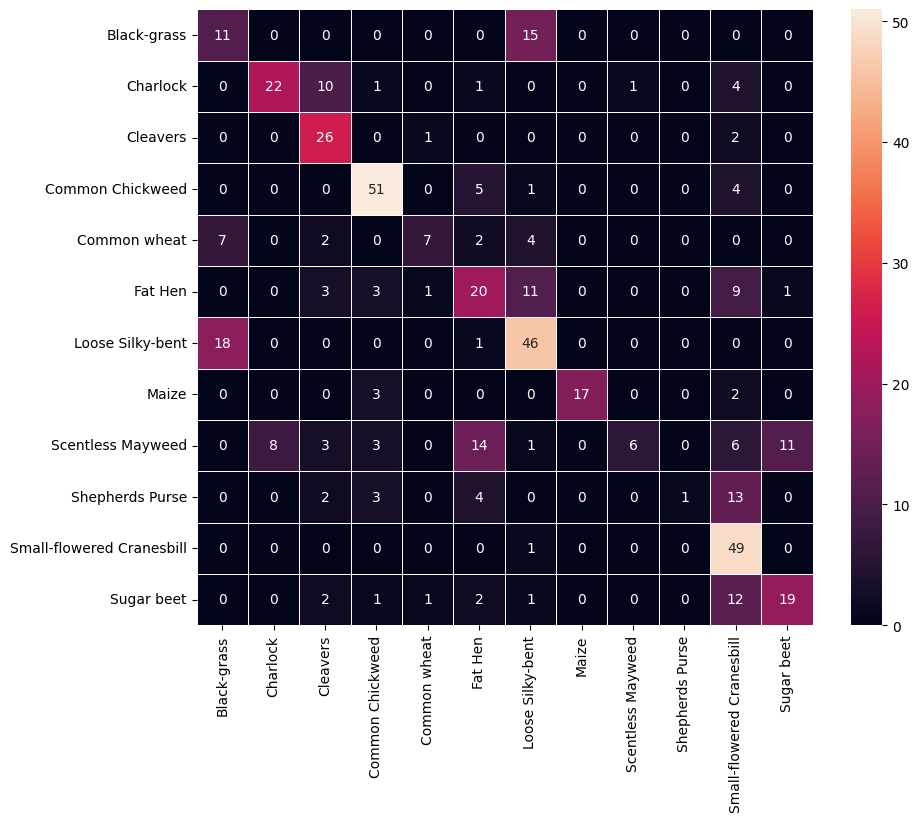

In [58]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_e,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    xticklabels=categories,
    yticklabels=categories,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [59]:
# Plotting the classification report
from sklearn import metrics
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.31      0.42      0.35        26
           1       0.73      0.56      0.64        39
           2       0.54      0.90      0.68        29
           3       0.78      0.84      0.81        61
           4       0.70      0.32      0.44        22
           5       0.41      0.42      0.41        48
           6       0.57      0.71      0.63        65
           7       1.00      0.77      0.87        22
           8       0.86      0.12      0.20        52
           9       1.00      0.04      0.08        23
          10       0.49      0.98      0.65        50
          11       0.61      0.50      0.55        38

    accuracy                           0.58       475
   macro avg       0.67      0.55      0.53       475
weighted avg       0.65      0.58      0.54       475



**Observations**:
-  It gives false alarm for black Grass,sugar beet,scented mayweed,sheperd purse,loose,silkbent,commonweed,etc,which are more than 60% plant categories which is not good.

**Model_5 with Data Augmentation**

In [67]:
#Clear keras
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [68]:
#Defining new model
model_5 = Sequential()

# Input_shape denotes input image dimension images
model_5.add(
    Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal', input_shape=(64, 64, 3))
)
model_5.add(BatchNormalization())
model_5.add(Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal'))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D((2, 2), padding='same'))
model_5.add(Dropout(0.3))

model_5.add(Conv2D(256, (5, 5), activation='relu', padding="same", kernel_initializer='he_normal'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(256, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal'))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D((2, 2), padding='same'))
model_5.add(Dropout(0.4))

model_5.add(Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal'))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D((2, 2), padding='same'))
model_5.add(SpatialDropout2D(0.3))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_5.add(Flatten())

model_5.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model_5.add(Dropout(0.5))
model_5.add(Dense(32, activation='relu'))
model_5.add(Dense(12, activation='softmax'))

opt = Adam(learning_rate=0.001)
model_5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │          73,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d (SpatialDropout2D) │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │              

 Total params: 1,381,900 (5.27 MB)

 Trainable params: 1,380,556 (5.27 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [69]:
epochs = 60
history= model_5.fit(train_datagen.flow(X_train_normalized,y_train_e,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_e),
                    verbose=1)

Epoch 1/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 240ms/step - accuracy: 0.1394 - loss: 5.2075 - val_accuracy: 0.1379 - val_loss: 5.0230
Epoch 2/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1719 - loss: 4.1114 - val_accuracy: 0.1379 - val_loss: 5.0239
Epoch 3/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.2969 - loss: 3.7488 - val_accuracy: 0.1379 - val_loss: 6.1617
Epoch 4/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2656 - loss: 3.2660 - val_accuracy: 0.1379 - val_loss: 6.1623
Epoch 5/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.3768 - loss: 3.0276 - val_accuracy: 0.1519 - val_loss: 5.4779
Epoch 6/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4375 - loss: 2.6179 - val_accuracy: 0.1519 - val_loss: 5.1828
Epoch 7/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.4127 - loss: 2.5841 - val_accuracy: 0.1659 - val_loss: 4.6261
Epoch 8/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4219 - loss: 2.2991 - val_accuracy: 0.1706 - 

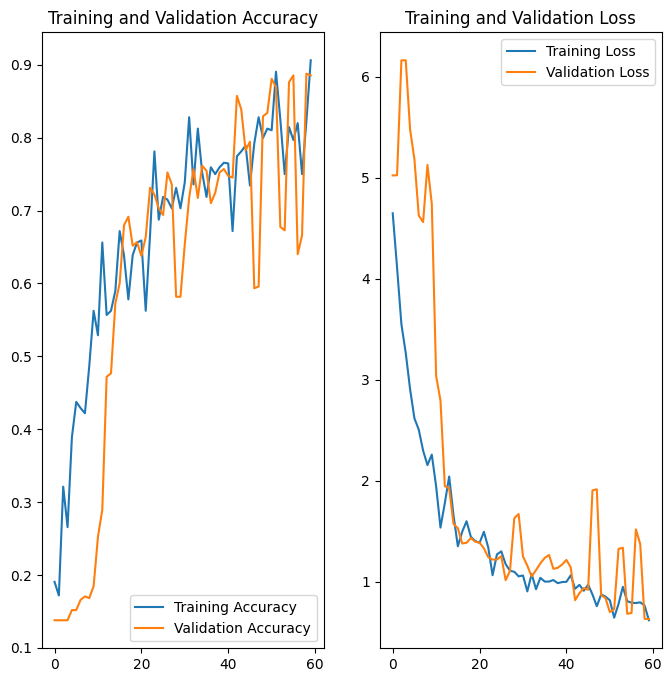

In [71]:
#Observing Accuracy and Loss response for both Training and validation data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=60

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Evaluating with test Data**

In [72]:
#Calculating accuracy for test data
accuracy = model_5.evaluate(X_test_normalized, y_test_e, verbose=2)

15/15 - 1s - 51ms/step - accuracy: 0.8400 - loss: 0.7283


In [73]:
# Here we would get the output as probablities for each category
y_pred=model_5.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


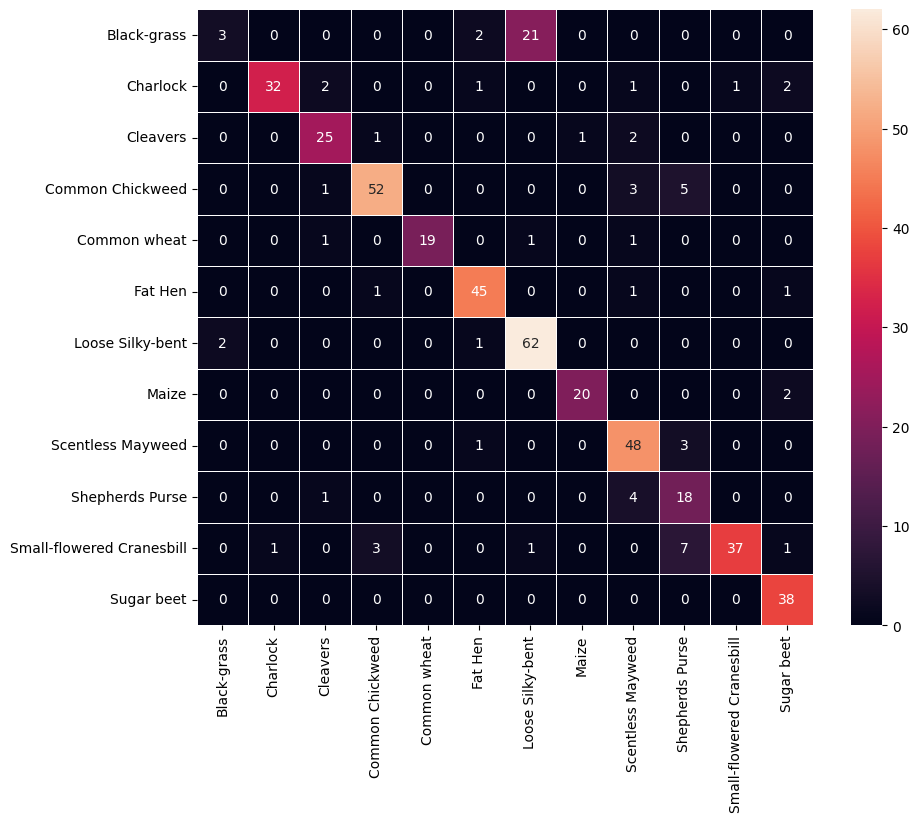

In [74]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_e,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    xticklabels=categories,
    yticklabels=categories,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [75]:
# Plotting the classification report
from sklearn import metrics
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.12      0.19        26
           1       0.97      0.82      0.89        39
           2       0.83      0.86      0.85        29
           3       0.91      0.85      0.88        61
           4       1.00      0.86      0.93        22
           5       0.90      0.94      0.92        48
           6       0.73      0.95      0.83        65
           7       0.95      0.91      0.93        22
           8       0.80      0.92      0.86        52
           9       0.55      0.78      0.64        23
          10       0.97      0.74      0.84        50
          11       0.86      1.00      0.93        38

    accuracy                           0.84       475
   macro avg       0.84      0.81      0.81       475
weighted avg       0.85      0.84      0.83       475



**Observations**
- This model(model_5) is the winning model which give Best performance out of all model.

**Model with Transfer Learning VGG16**

In [95]:
#Clear the keras session
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [96]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [98]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

new_model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
new_model.add(Dropout(0.5))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



In [99]:
# Generating the summary of the model
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,981,484 (57.15 MB)

 Trainable params: 266,796 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [100]:
# Epochs
epochs = 60
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_e,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_e),
                    verbose=1)

Epoch 1/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.1805 - loss: 3.8661 - val_accuracy: 0.3037 - val_loss: 2.4158
Epoch 2/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2812 - loss: 2.4014 - val_accuracy: 0.3061 - val_loss: 2.4040
Epoch 3/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.2799 - loss: 2.3589 - val_accuracy: 0.3481 - val_loss: 2.1221
Epoch 4/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2969 - loss: 2.1943 - val_accuracy: 0.3458 - val_loss: 2.1160
Epoch 5/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.3128 - loss: 2.1308 - val_accuracy: 0.3575 - val_loss: 2.0039
Epoch 6/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2812 - loss: 2.1494 - val_accuracy: 0.3621 - val_loss: 2.0030
Epoch 7/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.3483 - loss: 2.0280 - val_accuracy: 0.3925 - val_loss: 1.9055
Epoch 8/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2969 - loss: 2.0653 - val_accuracy: 0.3879

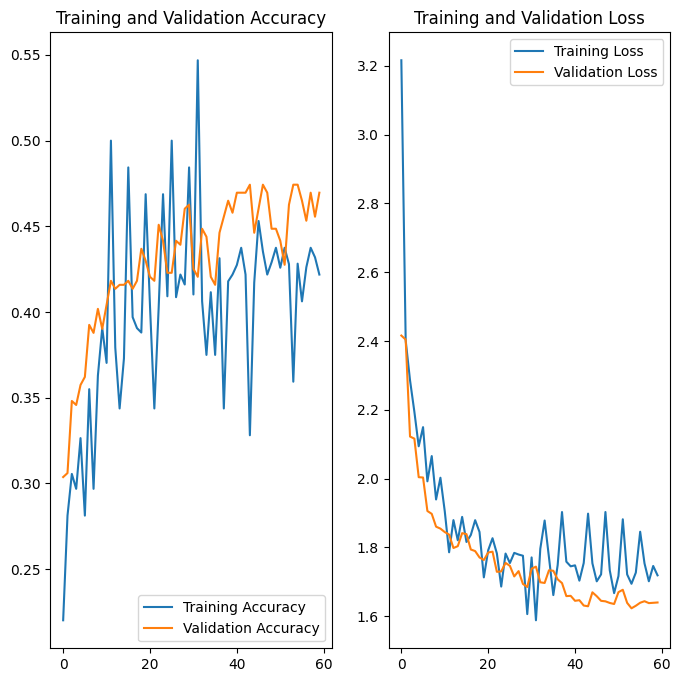

In [101]:
#Observing Accuracy and Loss response for both Training and validation data
acc = history_vgg16.history['accuracy']
val_acc = history_vgg16.history['val_accuracy']

loss = history_vgg16.history['loss']
val_loss =history_vgg16.history['val_loss']
epochs=60

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [102]:
#Calculating accuracy for test data
accuracy = new_model.evaluate(X_test_normalized, y_test_e, verbose=2)

15/15 - 3s - 174ms/step - accuracy: 0.4821 - loss: 1.6276


In [104]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step


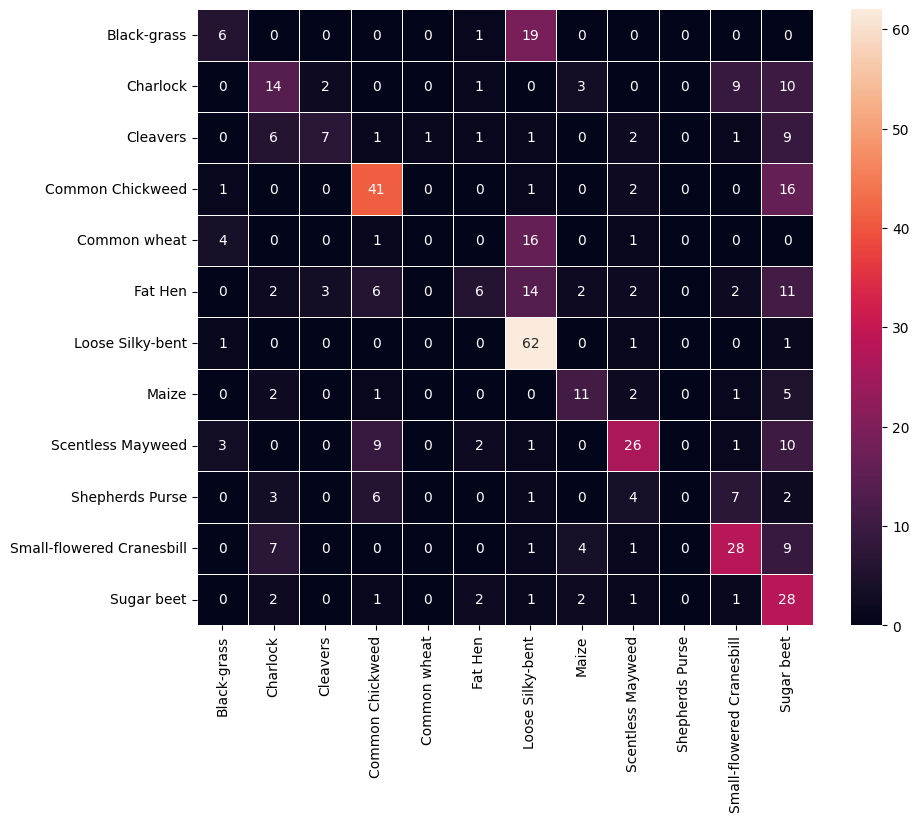

In [105]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_e,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    xticklabels=categories,
    yticklabels=categories,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [106]:
# Plotting the classification report
from sklearn import metrics
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.40      0.23      0.29        26
           1       0.39      0.36      0.37        39
           2       0.58      0.24      0.34        29
           3       0.62      0.67      0.65        61
           4       0.00      0.00      0.00        22
           5       0.46      0.12      0.20        48
           6       0.53      0.95      0.68        65
           7       0.50      0.50      0.50        22
           8       0.62      0.50      0.55        52
           9       0.00      0.00      0.00        23
          10       0.56      0.56      0.56        50
          11       0.28      0.74      0.40        38

    accuracy                           0.48       475
   macro avg       0.41      0.41      0.38       475
weighted avg       0.46      0.48      0.44       475



**Observations**
- With transfer model VGG16, I didnt get better performance.
- May be due to VGG16 was not trained on plant seedling data.

## **Final Model**

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [107]:
#Comparing model performance
Result_df=pd.DataFrame({'Models':['Base CNN Model With SGD','Base CNN Model With Adam','Model 3 with Batch Normalization and Dropout Layer','CNN Model with Data Augmentation with 30 Epoch','CNN Model with Data Augmentation With 60 Epoch','Transfer Learning With VGG16'],'Train Accuracy':['95%','96%','84%','62%','90%','42%'],'Validation Accuracy':['75%','73%','45%','58%','88%','46%'],'Test Accuracy':['75%','72%','46.5%','57%','84%','48%']})

In [108]:
Result_df

Models Train Accuracy  \
0                            Base CNN Model With SGD            95%   
1                           Base CNN Model With Adam            96%   
2  Model 3 with Batch Normalization and Dropout L...            84%   
3     CNN Model with Data Augmentation with 30 Epoch            62%   
4     CNN Model with Data Augmentation With 60 Epoch            90%   
5                       Transfer Learning With VGG16            42%   

  Validation Accuracy Test Accuracy  
0                 75%           75%  
1                 73%           72%  
2                 45%         46.5%  
3                 58%           57%  
4                 88%           84%  
5                 46%           48%

**Observations**
- From the above Result_df,we can see that model_1,model_2,model_3 are overfitting.
- After applying data augmentation overfitting issue got solved but performance of not great.
- So that I tried to increase the number of epoch from 30 to 60 which has given amazing performance.
- May be we can use transfer learning and observe the performance, but lack of resouces I used model_5 as

### **Visualizing the prediction**


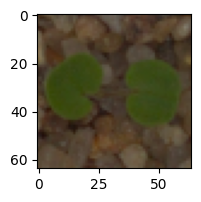

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


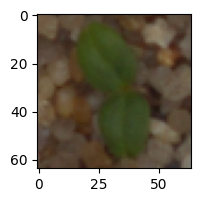

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Label ['Cleavers']
True Label Cleavers


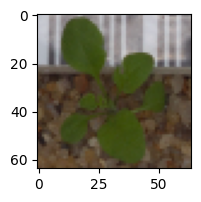

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [76]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', lb.inverse_transform(model_5.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', lb.inverse_transform(y_test_e)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', lb.inverse_transform(model_5.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', lb.inverse_transform(y_test_e)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', lb.inverse_transform(model_5.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', lb.inverse_transform(y_test_e)[36])

**Observations**
- I have tested 3 test data images which is giving me 100% accuracy.

## Actionable Insights and Business Recommendations

* I have seen that this dataset has imbance in distribution of target variable.If we will add more samples of data,we can improve the performance of model.
* I used data augmentation to make data balance,which is mitigating the problem of overfitting but to improve it's perfromance we can also use more different combinations of filters,adding number of convolution layer,etc.
* With this model,we can create app and distribute with farmers to quickly identify an unknown plant from a photograph, allowing them to make decisions immediately.
* This will reduce the manual work people need to put in to check if plants are growing correctly whether it is weed or good plant which will help farmer to treat weed at it's initial stage.
* As a result,better crop yields.Also,field of Agriculte educate the person who donot have any knowledge of crop who need to learn about it.

_____

In [3]:
!jupyter nbconvert --to html CV_Project_Plant_Seedlings_Classification_by_Kirti_Kamerkar.ipynb

[NbConvertApp] Converting notebook CV_Project_Plant_Seedlings_Classification_by_Kirti_Kamerkar.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 20 image(s).
[NbConvertApp] Writing 6049360 bytes to CV_Project_Plant_Seedlings_Classification_by_Kirti_Kamerkar.html
